In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [6]:
df = pd.read_csv("kickstarter_projects.csv")

## DIGARAM PIE CHART
Note ( karena dataya kebanyakan, jadi saya pisah menggunakan explode bang)

Penjelasan :
1. plt figure = untuk membuat size dari pada pie chartnya
2. plt. pie = untuk menggambar diagram pie nya
3. saya menggambil data dari state yang saya gunakan, dimana disini terlihat mana data statusnya gagal, sukses, batal , sedang berlangsung dan juga di tolak.
4. membuat autopct dengan 2 dibelakang koma dengan = > (autopct='%.2f%%')


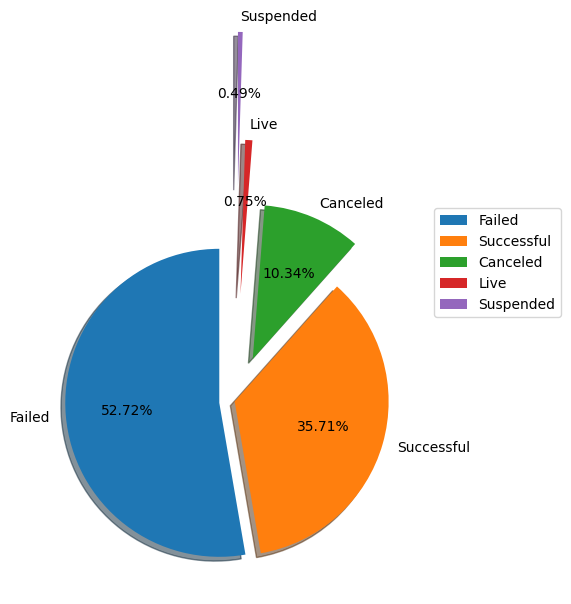

In [11]:
plt.figure(figsize=(15, 5))
plt.pie(df['State'].value_counts(), labels=df['State'].value_counts().index, autopct='%.2f%%', shadow=True, startangle=90, explode=[0.1, 0, 0.3, 0.7, 1.4])
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# Kesimpulan (Pie Chart)

Kesimpulan yang didapat bahwa pendanaan yang diusung kickstarter tidak terlalu berjalan mulus, karena dari data diatas, dpaat dikita lihat bahwa status pendanaan banyak yang berujung failed atau gagal yakni mencapai 52 %, dan banyak yang mencapai hasil successful yaitu sekitar 35 % .

### Menampikan rata-rata kategori yang di groupby dengan goal, pledged dan juga backers

In [12]:
mean = df.groupby("Category") [["Goal", "Pledged", "Backers"]].mean()
mean

,Goal,Pledged,Backers
Category,,,
Art,39199.586338,3221.210152,42.207914
Comics,19571.432295,6610.450134,134.771236
Crafts,10434.469406,1632.910773,27.283687
Dance,9580.253783,3453.811256,42.812583
Design,41875.654449,24420.643672,241.339764
Fashion,22411.104901,5712.867175,61.458574
Film & Video,83737.413150,6218.399065,66.953393
Food,49042.827310,5114.286353,54.179072
Games,44927.140979,21043.943478,321.840085


## HISTOGRAM CHART
Disini saya menampilkan jumlah goal yang yang ingin dicapai per tipe atau kategori proyek yang didanai kickstarter.

Penjelasan :
1. variable x saya ambil dari mean.index yaitu hitungan mean dari category syang di groupby dengan goal, pledged, dan backers
2. varible y saya ambil dari mean goal sendiri
3. memakai xticks untuk merotate label x nya ke sudut 90 derajat.
4. plt.title = > untuk membuat judul dari histogramnya

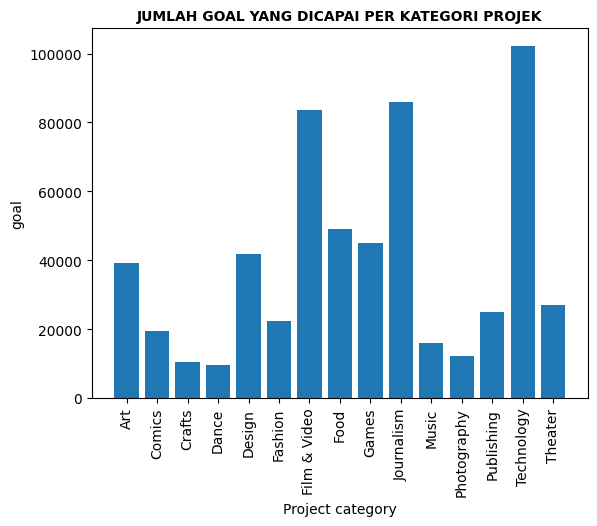

In [23]:
x = mean.index
y = mean["Goal"]
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.xlabel("Project category")
plt.ylabel("goal")
plt.title("JUMLAH GOAL YANG DICAPAI PER KATEGORI PROJEK", fontsize=10, fontweight="bold")
plt.show()

# Kesimpulan (Histogram chart)

dilihat bahwa project dengan kategori technology memiliki jumlah goal yang sangat besar, yang disusul oleh kategori project journalism di urutan ke 2, kemudian ada kategori film and video di urutan ke 3. 

# HEATMAP CHART
saya menampilkan kolom goal, pledged, dan backers dalam bentuk Heatmap.

Penjelasan :
1. membuat variable selected columns untuk menyeleksi kolum mana saja yang akan saya tampilkan ( menggunakan metode iloc[] )
2. membuat variable correlation matrix untuk membuat korelasi dari kolom yang akan saya korelasi ( menggunakan metode corr())
3. membuat heatmap menggunakan libary dari seaborn = > sb.heatmap

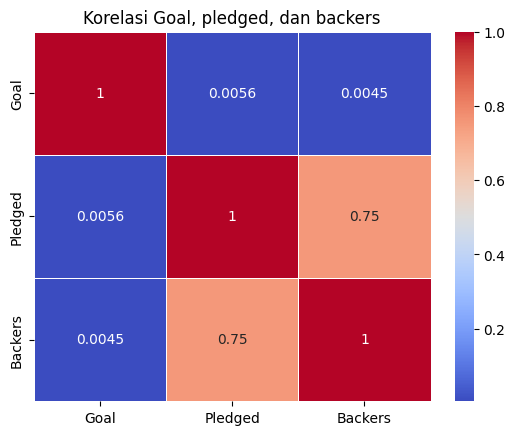

In [27]:
selected_columns = df.iloc[:, 5:10]
correlation_matrix = selected_columns.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasi Goal, pledged, dan backers')
plt.show()

# Kesimpulan (Heatmap Chart)

pada visualisasi diatas dapat dinyatakan bahwa backers dan pledged sangat mempengaruhi jumla goal yang ingin di capai oleh kick starter

# Mean untuk date time series

Penjelasan : 
1. Membuat variable time untuk memmbaca kolom date time series, disini saya memakai kolom Deadline
2. membuat variable gpd, dimana menjelaskan mean untuk goal per deadline yang ada, sehingga di groupby dengan deadline

In [32]:
time = pd.to_datetime(df.Deadline).dt.date
gpd = df.groupby(time)[["Goal"]].mean()
gpd

,Goal
Deadline,
2009-05-03,20.000000
2009-05-16,1650.000000
2009-05-20,300.000000
2009-05-22,30.000000
2009-05-26,1900.000000
...,...
2018-02-27,85501.500000
2018-02-28,16083.625000
2018-03-01,10695.000000


# LINE PLOT

menampilkan data dalam bentuk line plot berdasarkan mean data datetime series :
1. menggunakan liblary seaborn untuk menampilkan data yang ada
   
     a. sb.set_style => untuk membuat grid latar belakang

     b. sb.lineplot => untuk membuat data di line x dan line y dan hasilnya dari gpd

   
3. menampilkan jumlah goal yang ada pertahun deadline ditetapkan

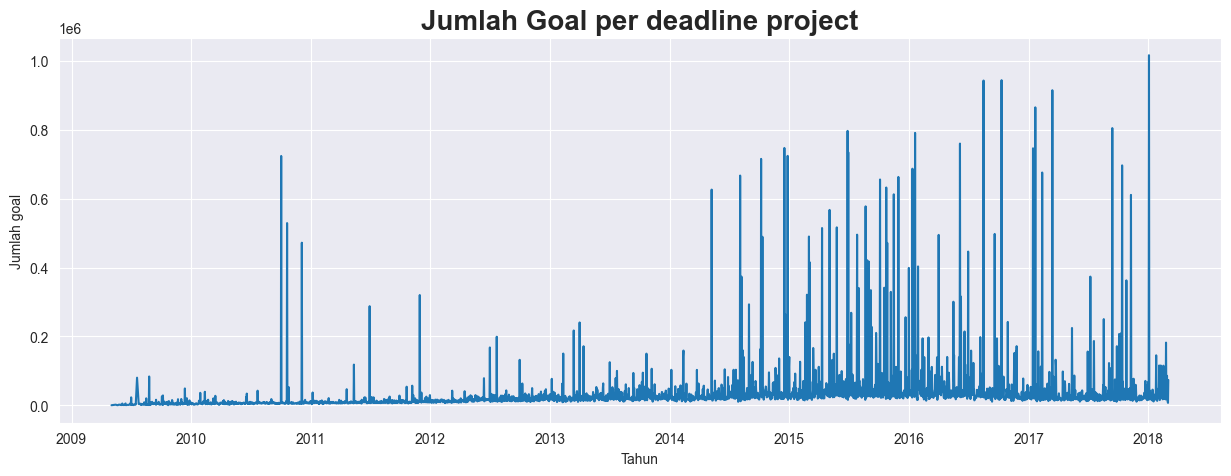

In [40]:
plt.figure(figsize=(15, 5))
sb.set_style("darkgrid")
sb.lineplot(data=gpd, x="Deadline", y="Goal")
plt.xlabel("Tahun")
plt.ylabel("Jumlah goal")
plt.title("Jumlah Goal per deadline project", fontsize=20, fontweight="bold")
plt.show()


# Kesimpulan (Line chart)

kesimpulan yang didapat dari data diatas adalah pada awal 2009 kicstarter terjun dalam pendanaan, jumlah goal yang ingin di capai tidak terlalu besar, sempat naik secara signifikan pada tahun 2011, kemudian naik turun di tahun 2011 sampai 2014, awal mula kenaikan signifikan mulai dari tahun pertengahan 2014 sampai pertengahan 2017 dimana kenaikan jumlah goal sampai mencapai 1.0  dan turunnya mentokdi 0.2 smapi akhirnya di tahun awal 2018, memiliki penurunan goal yang drastis dari lebih dari 1.0 sampai hanya 0.2.